In [26]:
import pandas as pd 
df = pd.read_csv('../chifoumy/data/chifoumi-dataset.csv')
df.head(2)

,filename,1x,1y,1z,2x,2y,2z,3x,3y,3z,...,19x,19y,19z,20x,20y,20z,21x,21y,21z,target
0,../raw_data/scissors/dFlxUAypUgfOZqoV.png,0.972548,0.503541,0.000002,0.888238,0.670902,-0.020812,0.766331,0.698617,-0.052920,...,0.682782,0.291712,-0.138871,0.707206,0.337388,-0.104174,0.752084,0.343444,-0.066942,2
1,../raw_data/scissors/b4Qm4ZK5AAUQo1Ax.png,0.883314,0.585556,0.000001,0.758897,0.738274,-0.000408,0.619175,0.731899,-0.014292,...,0.554995,0.351059,-0.067778,0.577250,0.405897,-0.036943,0.619907,0.421913,-0.008412,2


In [27]:
df.describe()

,1x,1y,1z,2x,2y,2z,3x,3y,3z,4x,...,19x,19y,19z,20x,20y,20z,21x,21y,21z,target
count,8208.000000,8208.000000,8.208000e+03,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,...,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000
mean,0.498215,0.496042,5.731623e-07,0.497596,0.553043,-0.015087,0.497673,0.571352,-0.029864,0.497956,...,0.498494,0.440604,-0.072921,0.497850,0.448023,-0.055157,0.497903,0.450076,-0.038176,1.001706
std,0.292279,0.292288,1.221204e-06,0.257598,0.250718,0.031433,0.223186,0.210190,0.048612,0.189036,...,0.186719,0.177661,0.079548,0.179455,0.172675,0.089577,0.191972,0.185598,0.095996,0.812356
min,-0.150064,-0.147117,-3.062199e-06,-0.078356,-0.070512,-0.263005,-0.040289,-0.000656,-0.317181,-0.046079,...,-0.085957,-0.065340,-0.374900,-0.151302,-0.058732,-0.409124,-0.205810,-0.076648,-0.429250,0.000000
25%,0.263999,0.270309,-3.524245e-07,0.266912,0.326108,-0.035257,0.301580,0.371687,-0.059719,0.372164,...,0.353425,0.301338,-0.125974,0.355797,0.317883,-0.115241,0.336347,0.309523,-0.105654,0.000000
50%,0.497810,0.489946,9.255353e-07,0.495409,0.627914,-0.016675,0.495612,0.632259,-0.034268,0.497721,...,0.499253,0.430815,-0.084451,0.498642,0.420642,-0.069765,0.497461,0.401043,-0.040849,1.000000
75%,0.731976,0.736126,1.478217e-06,0.728109,0.748820,0.005558,0.694955,0.735060,0.002794,0.625498,...,0.644160,0.553720,-0.012203,0.639919,0.573186,0.014488,0.659332,0.610617,0.033325,2.000000
max,1.149934,1.110032,3.154388e-06,1.072792,1.069952,0.186926,1.030578,1.023172,0.273608,1.030922,...,1.076971,1.078582,0.361737,1.141539,1.140382,0.437521,1.196496,1.192943,0.491018,2.000000


In [35]:
X = df.drop(['filename', 'target'], axis = 1)
y = df['target']

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
X_scaled.shape

(2049, 42)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)

In [7]:
X_train.shape

(1434, 42)

In [8]:
y_train.shape

(1434,)

In [9]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats

model = SVC()
search_space = {
    'kernel': ['sigmoid', 'rbf','linear', 'poly'],
    'C': [0.01, 0.1, 1,10,100,1000],
    'gamma': [0,0.1,1,10,100],
    'coef0': [0,0.1,1],
}

# Instanciate Random Search
rsearch = RandomizedSearchCV(
    model, search_space,
    n_jobs=-1, scoring='accuracy', cv=5, n_iter=360, verbose=0)
rsearch.fit(X_scaled,y)

/home/claire/.pyenv/versions/3.10.6/envs/chifoumy/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
360 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "/home/claire/.pyenv/versions/3.10.6/envs/chifoumy/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/claire/.pyenv/versions/3.10.6/envs/chifoumy/lib/python3.10/site-packages/sklearn/svm/_base.py", line 237, in fit
    raise ValueError(msg)
ValueError: gamma value must be > 0; 0 is invalid. Use a positive number or use '

RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=360, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10, 100, 1000],
                                        'coef0': [0, 0.1, 1],
                                        'gamma': [0, 0.1, 1, 10, 100],
                                        'kernel': ['sigmoid', 'rbf', 'linear',
                                                   'poly']},
                   scoring='accuracy')

In [10]:
rsearch.best_params_

{'kernel': 'poly', 'gamma': 1, 'coef0': 0, 'C': 0.01}

In [11]:
model = SVC(kernel= 'poly', gamma = 1, coef0 = 0, C = 0.01)

In [12]:
from sklearn.model_selection import cross_val_score
best_svc_cv_accuracy = cross_val_score(model, X_train, y_train, cv=5, scoring = 'accuracy').mean()
best_svc_cv_accuracy

0.9986062717770036

In [13]:
pd.DataFrame(X_scaled)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0.750407,0.536394,0.725377,0.721439,0.687355,0.679553,0.667436,0.569855,0.668307,0.477315,...,0.789690,0.404199,0.768201,0.258731,0.748319,0.292381,0.747557,0.313192,0.789461,0.323030
1,0.617794,0.604006,0.506950,0.786995,0.468141,0.712413,0.481905,0.583622,0.512383,0.485496,...,0.654196,0.493240,0.583956,0.316558,0.588955,0.345751,0.597638,0.371788,0.654389,0.385562
2,0.658591,0.615084,0.637821,0.464681,0.621318,0.344946,0.610195,0.418389,0.610753,0.530320,...,0.739094,0.546097,0.610525,0.735520,0.669640,0.660391,0.689697,0.594909,0.733604,0.573760
3,0.706204,0.494121,0.649177,0.646030,0.615858,0.561882,0.625043,0.428462,0.644007,0.356281,...,0.743083,0.243632,0.748732,0.171087,0.714330,0.165329,0.710941,0.198345,0.753432,0.228737
4,0.666562,0.554469,0.620161,0.468515,0.621392,0.391319,0.632232,0.466027,0.633622,0.561866,...,0.820810,0.629562,0.686489,0.790478,0.788842,0.741212,0.802955,0.664932,0.821764,0.627308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2044,0.496947,0.444363,0.500728,0.634604,0.496084,0.661116,0.447840,0.682971,0.410553,0.694878,...,0.584620,0.345574,0.485906,0.262905,0.440779,0.275107,0.478235,0.273597,0.554877,0.282295
2045,0.471629,0.568594,0.397061,0.799875,0.393410,0.830171,0.352605,0.840387,0.336316,0.744919,...,0.592524,0.479457,0.425318,0.351418,0.477506,0.378255,0.507374,0.366356,0.565788,0.366164
2046,0.428645,0.638871,0.315425,0.491617,0.327538,0.356230,0.337322,0.393496,0.372448,0.480560,...,0.568763,0.662486,0.416822,0.789226,0.451576,0.718215,0.476292,0.660127,0.538384,0.649158
2047,0.761383,0.418964,0.763191,0.639316,0.734409,0.683472,0.641796,0.718228,0.577713,0.677296,...,0.762456,0.371978,0.703461,0.208791,0.671341,0.283491,0.685912,0.299277,0.733059,0.287469


In [14]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes = np.linspace(1,1500, 10, dtype='int')

train_sizes, train_scores, test_scores = learning_curve(estimator = SVC(), 
                                          X = X_scaled,
                                          y= y,
                                          train_sizes = train_sizes,    
                                          scoring = 'accuracy',
                                          cv = 5)

train_scores_mean = np.mean(train_scores, axis = 1)
test_scores_mean = np.mean(test_scores, axis = 1)

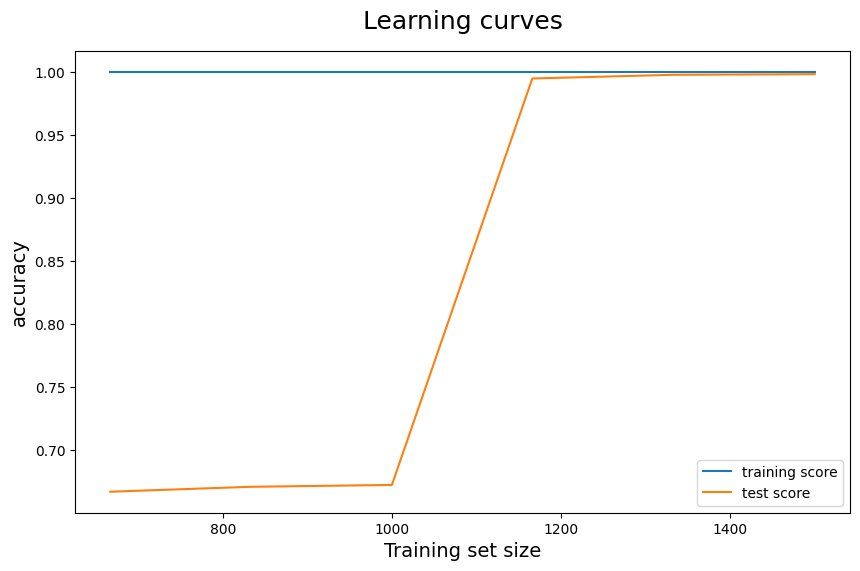

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_scores_mean, label = 'training score')
plt.plot(train_sizes, test_scores_mean, label = 'test score')
plt.ylabel('accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend();

In [16]:
# from sklearn.linear_model import LogisticRegressionCV

# las = LogisticRegressionCV(solver = 'saga',penalty = 'elasticnet', l1_ratios = np.linspace(0, 1, 10)).fit(X_train, y_train)
# las.coef_

In [25]:
%%time
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score


model.fit(X_train, y_train)
# rid = Ridge(10).fit(X_train, y_train)

# r2_score(y_test, rid.predict(X_test))

# r2_score(y_test, model.predict(X_test))
y_pred = model.predict(X_test)

CPU times: user 17.2 ms, sys: 2.03 ms, total: 19.2 ms
Wall time: 15 ms


In [19]:
results = pd.DataFrame({"actual" : y_test,
                       "predicted" : y_pred})

confusion_matrix = pd.crosstab(index= results['actual'],
                              columns = results['predicted'])
confusion_matrix

predicted,0,1,2
actual,,,
0,188,0,0
1,0,202,0
2,0,0,225


In [20]:
# y_test.index[y_pred != y_test]

Int64Index([], dtype='int64')

In [21]:
y_test

1730    0
463     2
1645    0
760     1
13      2
       ..
1133    1
1535    0
1069    1
258     2
1801    0
Name: target, Length: 615, dtype: int64

In [ ]:
# import pickle

# # Export Pipeline as pickle file 
# with open("pipe_tuned.pkl", "wb") as file:
#     pickle.dump(pipe_tuned, file)

#     Dans le nouveau challenge
# # Load Pipeline from pickle file
# my_pipeline = pickle.load(open(("../data-tuning-pipeline/pipe_tuned.pkl", "rb"))

In [22]:
# import pickle
# with open("model.pkl", "wb") as file:
#     pickle.dump(model, open('model.pkl', 'wb'))